In [172]:
import csv
from numpy import *
import numpy as np
import math
import matplotlib.pyplot as plt

original_data = []
with open('/home/kevin/Загрузки/housing.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader :
            #print(row)
            #print(', '.join(row))
            if len(row) == 2 :
                row[0] = row[0] + row[1] 
            original_data.append(row[0].split(","))
            #print(row[0].split(","))
print((original_data[12000]))
original_data.pop(0)

['-117.56', '33.94', '6.0', '575.0', '73.0', '318.0', '88.0', '7.0215', '257100.0', 'INLAND']


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [184]:
water_proximity_value = {
"<1H OCEAN" : [1, 0, 0],
"NEAR OCEAN" : [1, 1, 0],
"NEAR BAY" : [1, 1, 1],
"ISLAND" : [1, 1, 1 ],
"INLAND" : [0, 0, 0]
}
#пробный вариант преобразования. 
# Логика, что три параметра определяют близость к воде разными способами.

def Clean_Data(data) :
    result = []
    for row in data :
        #print(row)
        does_row_miss_data = False
        for i in range(0,9) :
            if row[i] == '' :
                does_row_miss_data = True
                print(row)
                break
            row[i] = float(row[i])
        if does_row_miss_data == True :
            continue
        if row[9] == "<1HOCEAN" :
            result.append(row[0:9] + water_proximity_value["<1H OCEAN"])
        elif row[9] == "ISLAND" :
            result.append(row[0:9] + water_proximity_value["ISLAND"])
        elif row[9] == "INLAND" :
            result.append(row[0:9] + water_proximity_value["INLAND"])
        elif row[9] == "NEAROCEAN" :
            result.append(row[0:9] + water_proximity_value["NEAR OCEAN"])
        elif row[9] == "NEARBAY": 
            result.append(row[0:9] + water_proximity_value["NEAR BAY"])
        else : 
            print("messed up somewhere")
    return result

In [285]:
train_data = Clean_Data(original_data[0:1001])
test_data = Clean_Data(original_data[1001:1501])
validation_data = Clean_Data(original_data[1501:2000])

[-122.16, 37.77, 47.0, 1256.0, '', '570.0', '218.0', '4.375', '161900.0', 'NEARBAY']
[-122.17, 37.75, 38.0, 992.0, '', '732.0', '259.0', '1.6196', '85100.0', 'NEARBAY']
[-122.28, 37.78, 29.0, 5154.0, '', '3741.0', '1273.0', '2.5762', '173400.0', 'NEARBAY']
[-122.24, 37.75, 45.0, 891.0, '', '384.0', '146.0', '4.9489', '247100.0', 'NEARBAY']
[-122.1, 37.69, 41.0, 746.0, '', '387.0', '161.0', '3.9063', '178400.0', 'NEARBAY']
[-122.14, 37.67, 37.0, 3342.0, '', '1635.0', '557.0', '4.7933', '186900.0', 'NEARBAY']
[-121.77, 39.66, 20.0, 3759.0, '', '1705.0', '600.0', '4.712', '158600.0', 'INLAND']
[-121.95, 38.03, 5.0, 5526.0, '', '3207.0', '1012.0', '4.0767', '143100.0', 'INLAND']
[-121.98, 37.96, 22.0, 2987.0, '', '1420.0', '540.0', '3.65', '204100.0', 'INLAND']
[-122.01, 37.94, 23.0, 3741.0, '', '1339.0', '499.0', '6.7061', '322300.0', 'NEARBAY']
[-122.08, 37.88, 26.0, 2947.0, '', '825.0', '626.0', '2.933', '85000.0', 'NEARBAY']
[-119.75, 36.71, 38.0, 1481.0, '', '1543.0', '372.0', '1.4577

In [286]:
print(len(train_data))

9901


In [287]:
def get_data_array(data, parameter,parameter_criteria = None, parameter_criteria_value = None) :
    result = []
    for row in data :
        if parameter_criteria != None and parameter_criteria_value != None :
            if row[parameter_criteria] == parameter_criteria_value :
                result.append(row[parameter])
        else : 
            result.append(row[parameter])
    return result

In [288]:
np.random.seed(777)

def get_random_batch(data, batch_size) :
    #print(data)
    #print('-------------')
    np.random.shuffle(data)
    #print(data)
    rnd = np.random.random() 
    return data[(0 + int(rnd*len(data)) - batch_size):(int(rnd * len(data)))]


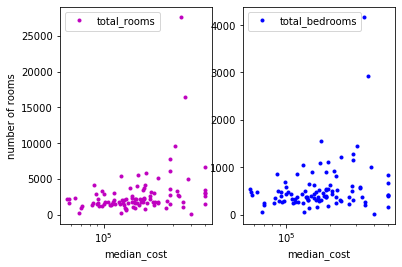

In [289]:
data = get_random_batch(train_data,100)

fig, axs = plt.subplots(1,2)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(get_data_array(data,8), get_data_array(data,3), 'm.',label = "total_rooms")
ax2.plot(get_data_array(data,8), get_data_array(data,4), 'b.',label = "total_bedrooms")
ax1.set_yscale('linear')
ax2.set_yscale('linear')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.set_xlabel('median_cost')
ax1.set_ylabel('number of rooms')
ax2.set_xlabel('median_cost')
#ax2.set_ylabel('number of rooms')


plt.show()

In [369]:
import torch

class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(11, n_hidden_neurons)
        self.act1 = torch.nn.ELU()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.ELU()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
#         print('starting data')
#         print(x)
        x = self.fc1(x)
#         print('after fc1')
#         print(x)
        x = self.act1(x)
#         print('after act1')
#         print(x)
        x = self.fc2(x)
#         print('after fc2')
#         print(x)
        x = self.act2(x)
#         print('after act2')
#         print(x)
        x = self.fc3(x)
#         print('after fc3')
#         print(x)
        return x

sine_net = SineNet(20)

In [370]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [371]:
def Split_data(data) :
    x_data = []
    y_data = []
    for row in data :
        x_data.append(row[0:8]+row[9:12])
        y_data.append(row[8])
    return x_data, y_data

In [372]:
# x_train = x_train.clone().detach()
# y_train = y_train.clone().detach()
# x_test = x_test.clone().detach()
# y_test =y_test.clone().detach()
# x_val = x_val.clone().detach()
# y_val = y_val.clone().detach()

x_train, y_train = Split_data(train_data)
x_test,y_test = Split_data(test_data)
x_val, y_val = Split_data(validation_data)

x_train = torch.as_tensor(x_train,dtype = torch.float)
y_train = torch.as_tensor(y_train,dtype = torch.float)
x_test  = torch.as_tensor(x_test,dtype = torch.float)
y_test  = torch.as_tensor(y_test,dtype = torch.float)
x_val   = torch.as_tensor(x_val,dtype = torch.float)
y_val   = torch.as_tensor(y_val,dtype = torch.float)

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)
x_test.unsqueeze_(1)
y_test.unsqueeze_(1)
x_val.unsqueeze_(1)
y_val.unsqueeze_(1)

x_train.requires_grad_()
y_train.requires_grad_()
x_test.requires_grad_()
y_test.requires_grad_()
x_val.requires_grad_()
y_val.requires_grad_()

print(x_train)

tensor([[[-118.3800,   33.8200,   35.0000,  ...,    1.0000,    1.0000,
             0.0000]],

        [[-124.1600,   41.7400,   15.0000,  ...,    1.0000,    1.0000,
             0.0000]],

        [[-118.4100,   34.1400,   33.0000,  ...,    1.0000,    0.0000,
             0.0000]],

        ...,

        [[-118.4300,   34.1500,   31.0000,  ...,    1.0000,    0.0000,
             0.0000]],

        [[-118.1600,   33.8900,   46.0000,  ...,    1.0000,    0.0000,
             0.0000]],

        [[-119.0700,   35.2700,   25.0000,  ...,    0.0000,    0.0000,
             0.0000]]], requires_grad=True)


In [373]:
def loss(pred, target):
    squares = (pred - target) ** 2
    #print(squares)
    return squares.mean()


In [374]:
def predict(net, x, y):
    y_pred = net.forward(x)
    
    #print(loss(y_pred, y))
    #plt.bar(np.arange(len(x)),y,label = 'real cost')
    #plt.bar(np.arange(len(x)),y_pred,label = 'pred cost')
    
#predict(sine_net, x_val, y_val)

In [381]:
for epoch_index in range(1000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    #print(y_pred)
#     for i in range(len(y_pred)) :
#         print("pred: " + str(y_pred[i]))
#         print("real: " + str(y_train[i]))
    loss_val = loss(y_pred, y_train)
    print(loss_val)
    loss_val.backward()
    #print(sine_net.parameters())
    optimizer.step()
    
predict(sine_net, x_val, y_val)

tensor(1.3717e+10, grad_fn=<MeanBackward0>)
tensor(1.3716e+10, grad_fn=<MeanBackward0>)
tensor(1.3716e+10, grad_fn=<MeanBackward0>)
tensor(1.3715e+10, grad_fn=<MeanBackward0>)
tensor(1.3714e+10, grad_fn=<MeanBackward0>)
tensor(1.3714e+10, grad_fn=<MeanBackward0>)
tensor(1.3713e+10, grad_fn=<MeanBackward0>)


KeyboardInterrupt: 